<a href="https://colab.research.google.com/github/Ashish265/Machine-Learning-projects/blob/master/Implementation_of_One_class_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
%matplotlib inline

In [3]:
columns = ["duration",
"protocol_type",
"service",
"flag",
"src_bytes",
"dst_bytes",
"land",
"wrong_fragment",
"urgent",
"hot",
"num_failed_logins",
"logged_in",
"num_compromised",
"root_shell",
"su_attempted",
"num_root",
"num_file_creations",
"num_shells",
"num_access_files",
"num_outbound_cmds",
"is_host_login",
"is_guest_login",
"count",
"srv_count",
"serror_rate",
"srv_serror_rate",
"rerror_rate",
"srv_rerror_rate",
"same_srv_rate",
"diff_srv_rate",
"srv_diff_host_rate",
"dst_host_count",
"dst_host_srv_count",
"dst_host_same_srv_rate",
"dst_host_diff_srv_rate",
"dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate",
"dst_host_serror_rate",
"dst_host_srv_serror_rate",
"dst_host_rerror_rate",
"dst_host_srv_rerror_rate",
"label"]

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!ls /content/drive/'My Drive'/Datasets/

kddcup.data.corrected


In [6]:
!ls /content

drive  kddcup.data.corrected  sample_data


In [7]:
! cp -p /content/drive/'My Drive'/Datasets/kddcup.data.corrected /content/kddcup.data.corrected

In [8]:
df = pd.read_csv("/content/kddcup.data.corrected",sep=",",names=columns,index_col=None)

In [9]:
df.shape

(4898431, 42)

In [10]:
df= df[df['service']=="http"]

df = df.drop('service',axis=1)

columns.remove('service')

novelties = df[df['label']!="normal."]

novelties_normal = df[150000:154045]


novelties = pd.concat([novelties,novelties_normal])

normal = df[df['label']=="normal."]

In [11]:
print(novelties.shape)
print(normal.shape)

(8090, 41)
(619046, 41)


In [12]:
for col in novelties.columns:

  if novelties[col].dtype == 'object':
    encoded = LabelEncoder()
    encoded.fit(novelties[col])
    novelties[col] = encoded.transform(novelties[col])


for col in normal.columns:

  if normal[col].dtype == 'object':
    encoded2 = LabelEncoder()
    encoded2.fit(normal[col])
    normal[col] = encoded2.transform(normal[col])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [26]:
for f in range(0,3):
  normal = normal.iloc[np.random.permutation(len(normal))]


df2 = pd.concat([normal[:100000],normal[200000:250000]])

df_validate =normal[100000:150000]

X_train,x_test= train_test_split(df2,test_size=0.2,random_state=42)

x_val= df_validate

In [18]:
X_train.shape

(120000, 41)

In [19]:
x_test.shape

(30000, 41)

In [20]:
x_val.shape

(50000, 41)

In [22]:
ocsvm = OneClassSVM(kernel='rbf',gamma=0.00005,nu=0.1)

In [23]:
ocsvm.fit(X_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=5e-05, kernel='rbf',
            max_iter=-1, nu=0.1, shrinking=True, tol=0.001, verbose=False)

In [24]:
preds = ocsvm.predict(x_test)
score= 0
for f in range(0,x_test.shape[0]):
   if preds[f]==1:
     score += 1

Accuracy = score/x_test.shape[0]
print(Accuracy)

0.8971333333333333


In [27]:
preds = ocsvm.predict(x_val)
score= 0
for f in range(0,x_val.shape[0]):
   if preds[f]==1:
     score += 1

Accuracy = score/x_val.shape[0]
print(Accuracy)

0.89728


In [28]:
from sklearn.metrics  import roc_auc_score

preds =ocsvm.predict(novelties)

matches = novelties['label'] == 4

auc = roc_auc_score(preds,matches)

print(auc)

0.9588897597887839


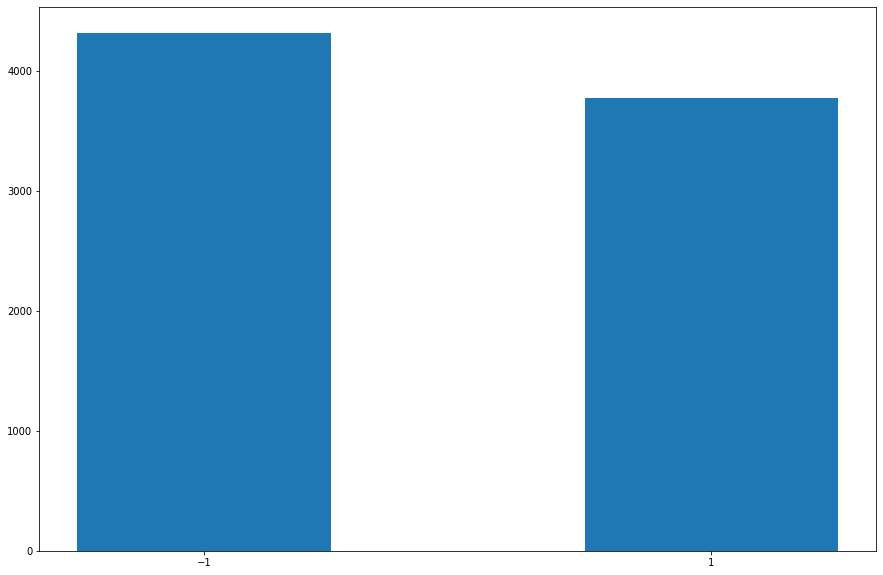

In [30]:

plt.figure(figsize=(15,10))
plt.hist(preds,bins=[-1.5,-0.5]+[0.5,1.5],align='mid')
plt.xticks([-1,1])
plt.show()